# Random Forest

In [1]:
# for data manipulation
import pandas as pd
import numpy as np

In [4]:
# for grid search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# for evaluation metric
# accuracy
from sklearn.metrics import accuracy_score
# Report
from sklearn.metrics import classification_report
# AUC
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from pylab import rcParams

In [ ]:
# for random forest
from sklearn.ensemble import RandomForestClassifier

### Load Data

In [ ]:
y_train = pd.read_feather(y_train)
X_train = pd.read_feather(X_train)
y_test = pd.read_feather(y_test)
X_test = pd.read_feather(X_test)

## Random Forest

In [69]:
rf = RandomForestClassifier(n_estimators=50)
param_grid = {
    'max_depth': range(3, 6),
    'max_leaf_nodes': range(8, 12),
    'max_features': ['sqrt', 'auto', 'log2']
}

rf_cv = GridSearchCV(estimator=rf,
                     param_grid=param_grid,
                     cv=5)
rf_cv.fit(X_train, y_train)
print(rf_cv.best_params_)

{'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': 11}


In [20]:
start_time = time.time()

rf = RandomForestClassifier(n_estimators=100, max_depth=5,
                            max_leaf_nodes=11, max_features='log2',
                            bootstrap=True, oob_score=True)
rf.fit(X_train, y_train)

rf_time = time.time() - start_time
print("--- %s seconds ---" % (time.time() - start_time))

--- 75.84095072746277 seconds ---


Feature importance of Random Forest Model


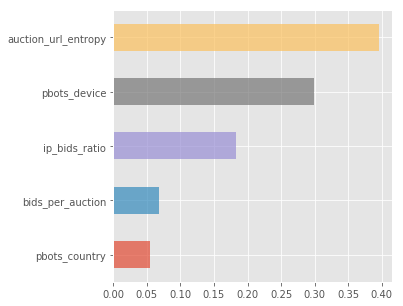

In [36]:
# Check feature importance and display in bar plot.
print('Feature importance of Random Forest Model')
plt.style.use('ggplot')
fig = plt.figure(figsize=(5, 5))
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nsmallest(5).plot(kind='barh', alpha=0.7)
fig.savefig('rf_feature.png')

### Evaluation Metric

#### Accuracy

In [23]:
y_rf_pred = rf.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_rf_pred, y_test):.3f}")

Random Forest Accuracy: 0.922


#### AUC

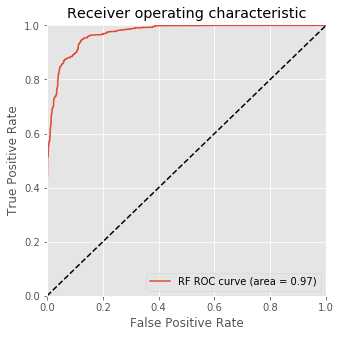

In [24]:
# Plot ROC in one graph
y_rf_score = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _rf = roc_curve(y_test, y_rf_score)
roc_rf_auc = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(5, 5))
plt.plot(fpr_rf, tpr_rf, label='RF ROC curve (area = %0.2f)' % roc_rf_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.005])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
fig.savefig('roc_rf_auc.png')

#### Precision vs. Recall

In [25]:
print('Classification Report of Random Forest Model')
print(classification_report(y_test, y_rf_pred))

Classification Report of Random Forest Model
              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95    531415
         1.0       0.66      0.88      0.75     82290

   micro avg       0.92      0.92      0.92    613705
   macro avg       0.82      0.90      0.85    613705
weighted avg       0.94      0.92      0.93    613705



In [ ]:
rf_time.to_feather(rf_time)
y_rf_pred.to_feather(y_rf_pred)